In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
from datetime import datetime

# San Diego International Airport (SAN) Performance Analysis

### Author: Shichao Han (schan21@berkeley.edu)
**April 2, 2019**     

# Introduction  
### 1. Data Source:  
(1) The 2011 and 2018 San Diego Airport Operation Data comes from the Department of Transportation's public data. No confidential data are involved in this analysis.   
(2) Aircrafts' performance data are downloaded from [Beoing](https://www.boeing.com/commercial/airports/plan_manuals.page) and [Airbus](https://www.airbus.com/aircraft/support-services/airport-operations-and-technical-data/aircraft-characteristics.html )'s official website. (Click to see the link).  
### 2. Objectives:  
(1) Examine airports' operation data and analyze the trend; provide information about airport's performance 
(2) **Critical Aircraft** analysis (critical aircraft: the most demanding aircraft type, or grouping of aircraft with similar characteristics, that make the regular use of the airport (regualr use: > 500 anual operations)).   
(3) **Runway requirements**  
(4) **Average Weekday Peak Month(AWPM)** Analysis for 2011 data. AWPM: one weekday representative of the month with peak operation counts  
(5) **Forcasting** the growth  
(6) **2018** Paerformance Analysis  
(7) **Discussion**: on possible influence seen by passengers, FAA and the airport



### Data Preparation

In [3]:
san_old = pd.read_csv('2011_SAN_OAG.csv')
san_new = pd.read_csv('2018_SAN_OAG.csv')

In [4]:
san_old['dt'] = pd.to_datetime(san_old['Dep_Date'] + " " + san_old['Dep_Time'])

In [5]:
san_old['at'] = pd.to_datetime(san_old['Arr_Date'] + " " + san_old['Arr_Time'])

In [6]:
san_old_dept = san_old[san_old['Dep Airport Code'] =='SAN']
san_old_arr = san_old[san_old['Arr Airport Code'] =='SAN']
san_old_dept_monthday = pd.read_csv('./output/san_old_dept_monthday.csv').iloc[:,1:]
day_counts = pd.read_csv('./output/day_counts.csv').iloc[:,1:]
day_counts = pd.read_csv('./output/day_counts.csv').iloc[:,1:]

In [7]:
rolling_18 = pd.read_csv('./output/rolling_18.csv').iloc[:,1:]

In [8]:
san_18_actype = pd.read_csv('./output/san_18_actype.csv')

In [9]:
aircraft_type_2011 = san_old['Specific Aircraft Name'].value_counts().to_frame()

In [10]:
san_2011_actype = pd.read_csv('./output/aircraft_type_2011.csv')

In [11]:
san_new_summ = pd.read_csv('./output/san_new_summ.csv').iloc[:,1:]

In [12]:
awpm_17_summ = pd.read_csv('./output/awpm_17_summ.csv').iloc[:,1:]

In [13]:
awpm_17_summ['total operation count'] = awpm_17_summ['dept count'] + awpm_17_summ['arr count']


In [14]:
grouped_seats = san_old['Seats'].value_counts().to_frame().rename(columns = {'Seats': 'Count'}).reset_index()
grouped_seats = grouped_seats.rename(columns = {'index': 'Seats Number'})
grouped_seats = grouped_seats.sort_values('Count', ascending = False)

In [15]:
by_seats_and_type = san_old[['Seats', 'Specific Aircraft Name']].groupby(['Seats', 'Specific Aircraft Name']).agg(len).to_frame()

In [16]:
by_seats_and_type = by_seats_and_type.rename(columns = {0: 'Counts'})

In [17]:
san_new_by_seats = pd.read_csv('./output/san_new_by_seats.csv').iloc[:,1:]

## Part I: 2011 Design Aircraft 

**Definition** of **critical aircraft**: the most demanding aircraft type, or grouping of aircraft with similar characteristics, that make the regular use of the airport (regualr use: > 500 anual operations).  


_MOTIVATION_: although it is reasonable to group the aircrafts by their total seats number, the aircraft producers (e.g. Boeing and Airbus) provide detailed data on aircraft characteristics based on aircraft type. The data source for the Rayload charts is also the motivation behind the grouping by aircraft type in order to determine deterministic aircraft type of airport planning. 


### 1. Number of operations by aircraft type

In [18]:
san_2011_actype

,Aircraft Type,Count
0,Boeing 737-700 Passenger,41928
1,Boeing 737-300 Passenger,22095
2,Airbus A320,16758
3,Boeing 737-800 Passenger,8594
4,Boeing 737-800 (winglets) Passenger,7939
5,Airbus A319,7429
6,Embraer RJ140,7144
7,Embraer 120 Brasilia,6344
8,Canadair Regional Jet,5370
9,Boeing 757-200 Passenger,4930


### 2. Design aircraft

#### Approach I: grouping by aircraft type   
Answer: **Boeing 767-300 Passenger** (without grouping) and **Boeing 777 Passenger** (after grouping)

_MOTIVATION_: Runway length requirements, Airport Design Group, and other airport design requirements are determined by aircraft type. Therefore, grouping by aircraft type might produce meaningful data summary that can be meaninigful to the airport planning decision making. 

In [19]:
san_2011_actype['Percentage(%)'] = (san_2011_actype['Count']/len(san_old)) * 100
san_2011_actype

,Aircraft Type,Count,Percentage(%)
0,Boeing 737-700 Passenger,41928,26.015736
1,Boeing 737-300 Passenger,22095,13.709637
2,Airbus A320,16758,10.398104
3,Boeing 737-800 Passenger,8594,5.332456
4,Boeing 737-800 (winglets) Passenger,7939,4.926038
5,Airbus A319,7429,4.609590
6,Embraer RJ140,7144,4.432752
7,Embraer 120 Brasilia,6344,3.936363
8,Canadair Regional Jet,5370,3.332010
9,Boeing 757-200 Passenger,4930,3.058996


(1) **Without Grouping**  
According to the data summary in Q1 and refering to the aircraft characteristics data, among all the aircraft types that excede an anual operations of more than 500, **Boeing 767-300 Passenger** would be the design aircraft.  

(2) **Grouping**  
However, there are several variants of Boeing 767 in the group. Also, the grouping will take the aircraft with similar features together. **Boeing 777 passenger**, with 424 total operations each year, will be included in this group for the following reason:  
(1) Boeing 777 is larger in size and has more demanding requirements for airport design.  
(2) Boeing 777 is designed as the enlarged version of 767. They share many similarity. [See the link](https://en.wikipedia.org/wiki/Boeing_777)  
Although Boeing 777 alone does not achieve the 500 operations per year requirements, grouping Boeing 777 with 767 meet the 500 annual operations requirement by FAA. Therefore, after grouping, **Boeing 777** will be the desigh aircraft. 

The following is total number of operations by **Boeing 767-300**:

In [20]:
sum(san_2011_actype[san_2011_actype['Aircraft Type'] == 'Boeing 767-300 Passenger']['Count']) 

1284

The following is total number of operations by **Boeing 777 and Boeing 767**:

In [21]:
sum(san_2011_actype[(san_2011_actype['Aircraft Type'] >= 'Boeing 767')&(san_2011_actype['Aircraft Type'] <= 'Boeing 777 Passenger')]['Count'])

1746

In [22]:
san_2011_actype[(san_2011_actype['Aircraft Type'] >= 'Boeing 767')&(san_2011_actype['Aircraft Type'] <= 'Boeing 777 Passenger')]

,Aircraft Type,Count,Percentage(%)
19,Boeing 767-300 Passenger,1284,0.796704
23,Boeing 777 Passenger,424,0.263086
27,Boeing 767-200 Passenger,36,0.022337
29,Boeing 767-400 Passenger,2,0.001241


#### Approach II: grouping by seats number 

_MOTIVATION_: It is reasonable to draw a positive correlation between total number of seats on the aircraft and the airport planning requirements. 

In the data visualization below, we can observe that there is a peak in the operation counts for aircraft with around 140 seats. 

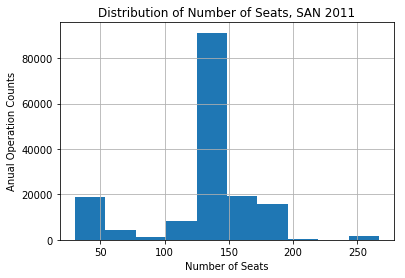

In [23]:
san_old[['Seats']].hist()
plt.xlabel('Number of Seats')
plt.ylabel('Anual Operation Counts')
plt.title('Distribution of Number of Seats, SAN 2011')
plt.show()

According to the data visualization, there are group of aircrafts with more than 250 seats. Do they exceed the total operations of 500 per year? **Yes**

In [38]:
by_seats_and_type1 = san_old.groupby(['Seats','Specific Aircraft Name']).agg(len)['Flight No'].reset_index()
by_seats_and_type1 = by_seats_and_type1.rename(columns = {'Flight No': 'Counts'})
by_seats_and_type1

,Seats,Specific Aircraft Name,Counts
0,30,Embraer 120 Brasilia,6344
1,44,Embraer RJ140,7144
2,50,Canadair Regional Jet,5370
3,66,Canadair Regional Jet 700,2266
4,70,Canadair Regional Jet 700,820
5,70,Canadair Regional Jet 900,288
6,76,Canadair Regional Jet 900,1050
7,76,Embraer 170,16
8,93,Embraer 190,730
9,98,Embraer 190,370


In [39]:
sum(by_seats_and_type1[by_seats_and_type1['Seats']>250]['Counts'])

1532

Therefore, the design aircraft if we group using number of seats is the aircraft that is most demanding among the group of aircrafts **with more than 250 seats**; there are **1532** operations at total. 

In [40]:
by_seats_and_type1[by_seats_and_type1['Seats']>250]

,Seats,Specific Aircraft Name,Counts
73,252,Boeing 757-300 Passenger,2
74,252,Boeing 767-300 Passenger,730
75,262,Boeing 767-300 Passenger,376
76,267,Boeing 777 Passenger,424


Among the group, **Boeing 777** is the most demanding aircraft, with a total anual operation of **424**.

**Both approaches** produce the same results. Therefore, we can use **Boeing 777** as our desigh aircraft. 

### 3. Key Dimensions of Aircrafts

**Four key dimensions: ** (1) Wingspan (2) Tail height (3) Fulselage length (4) Wheel span

_According to the document AC 150/5000-17_, if there are variants within the group, take the maximal of each dimensions for consideration.

Using **Boeing 777** as the design aircraft, we examine the variant in Boeing 777 that has the largest dimension requirement. 

**Max Wingspan:** 64.80 m (212 ft 7 in) (from 777-300ER)   
**Tail height:** 18.85 m (61 ft 10 in) (from 777-300ER)       
**Length:** 73.86 m (242 ft 4 in) (from 777-300ER)  
**Wheel span:** 10.97 m (36 ft 0 in)  

**ADG Group for Boeing 777(-300ER)**  
by **FAA**: **V**  
by **ICAO**: **E**

### 4. Discussion

The results using the official definition of design aircraft would be the same as the result of using seats, as shwon in part 2. That is, the design aircraft determined by aircraft type or total seats number are the same. 

---
## II Runway requirements for 2011  
### 5. Determine the runway length requirements 

Use **Boeing 777-300ER** as the design aircraft. 

Because **SAN** is roughly at sea level, when taking look at the Payload chart for **Runway Length Requirement** at Maximum Take Off Weight, the 777-300ER variant with the greatest runway length requirement is roughly 3200 m (10,500 ft).

In [41]:
from IPython.display import Image

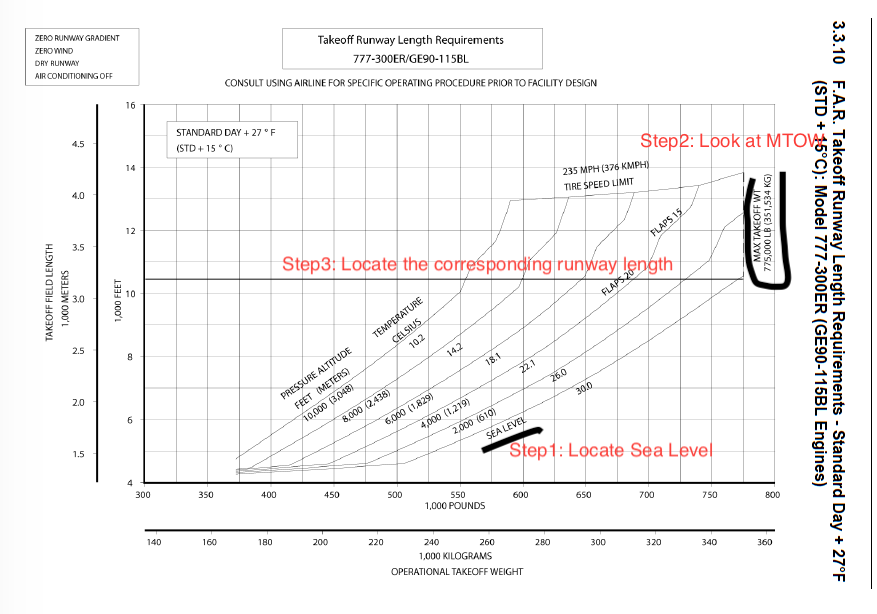

In [42]:
Image('./output/runwaylength.png')

### 6. Determining the Runway Length Requirement 

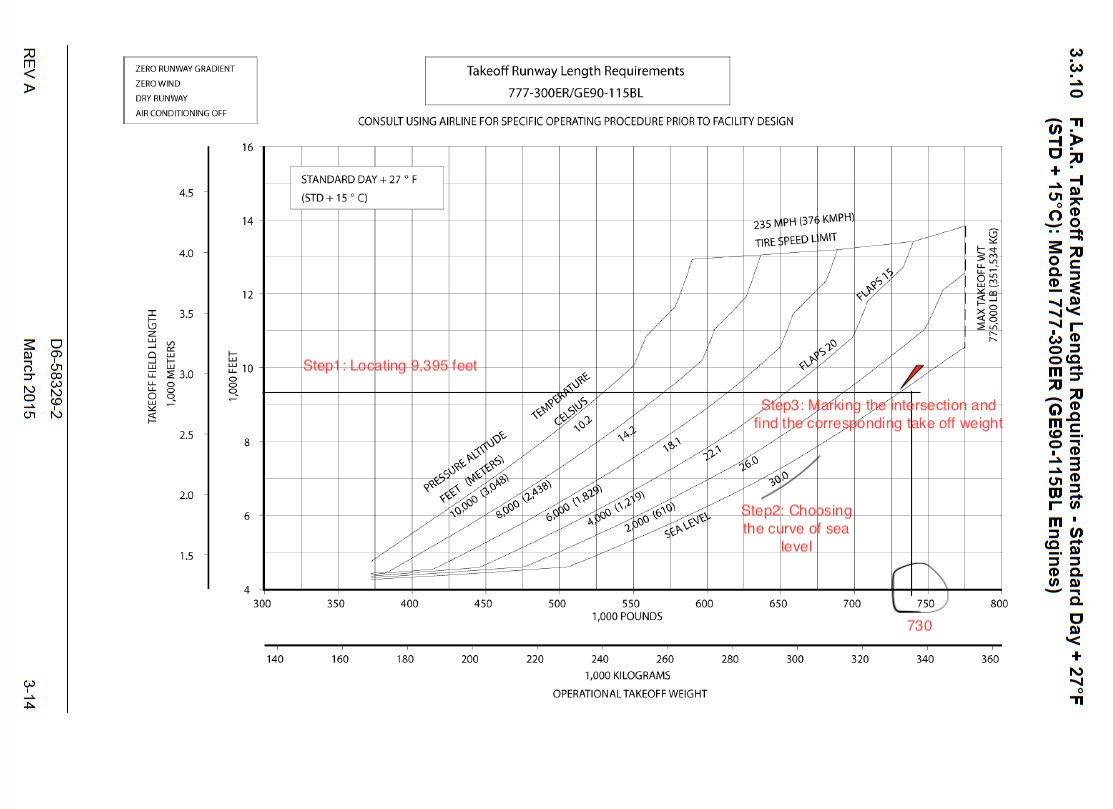

In [43]:
Image('./output/q9.png')

No, it is not sufficient for the **Boeing 777-300ER** to take off at its MTOW. The maximum take off weight that this runway can accomodate is **730,000 pounds**. 

---
## III Calculation for the average weekday peak month for 2011
### 7. 2011 SAN Operations Summary

In [44]:
monthly_dept = san_old[san_old['Dep Airport Code'] =='SAN'].groupby(san_old['dt'].dt.month)['Flight No'].agg(len).to_frame()

In [45]:
san_old_dept = san_old[san_old['Dep Airport Code'] =='SAN']
san_old_arr = san_old[san_old['Arr Airport Code'] == 'SAN']

In [46]:
san_old_dept_count = san_old_dept.groupby(san_old_dept['dt'].dt.month)['dt'].agg(len)

In [47]:
san_old_dept_count = san_old_dept_count.to_frame().rename(columns = {'dt':'Departure Count'})

In [48]:
san_old_arr_count = san_old_arr.groupby(san_old_arr['at'].dt.month)['at'].agg(len)

In [49]:
san_old_arr_count = san_old_arr_count.to_frame().rename(columns = {'at':'Arrival Count'})

In [50]:
san_old_count_summary = san_old_dept_count.merge(san_old_arr_count, left_index=True, right_index = True)

In [51]:
san_old_count_summary = san_old_count_summary.reset_index().rename(columns = {'dt':'Month'})

In [52]:
san_old_count_summary['Total Operation Count'] = san_old_count_summary['Departure Count'] + san_old_count_summary['Arrival Count']

In [53]:
san_old_count_summary

,Month,Departure Count,Arrival Count,Total Operation Count
0,1,6562,6559,13121
1,2,5983,5982,11965
2,3,6806,6806,13612
3,4,6512,6515,13027
4,5,6846,6841,13687
5,6,6964,6965,13929
6,7,7233,7234,14467
7,8,7164,7164,14328
8,9,6558,6562,13120
9,10,6752,6752,13504


In [54]:
hourly_summary = san_old_dept.groupby(san_old['dt'].dt.hour)['dt'].agg(len).to_frame().rename(columns = {'dt' : 'departure count'})
hourly_summary = hourly_summary.reset_index().rename(columns = {'dt': 'departure hour'})

In [55]:
hourly_summary = hourly_summary.set_index('departure hour')

In [56]:
arrival_summary = san_old_arr.groupby(san_old['at'].dt.hour)['at'].agg(len).to_frame().rename(columns = {'at' : 'arrival count'})
arrival_summary = arrival_summary.reset_index().rename(columns = {'at': 'arrival hour'})
arrival_summary = arrival_summary.set_index('arrival hour')

### 8. Peak Month

In [57]:
san_old_count_summary = pd.read_csv('./output/q8_summary.csv')
san_old_count_summary['Operation Per Day'] = san_old_count_summary['Total Operation Count']/ day_counts['day']
san_old_count_summary.iloc[:, 2:]

,Month,Departure Count,Arrival Count,Total Operation Count,Departure Per Day,Arrivals Per Day,Operation Per Day
0,1,6562,6559,13121,211.677419,211.580645,423.258065
1,2,5983,5982,11965,213.678571,213.642857,427.321429
2,3,6806,6806,13612,219.548387,219.548387,439.096774
3,4,6512,6515,13027,217.066667,217.166667,434.233333
4,5,6846,6841,13687,220.838710,220.677419,441.516129
5,6,6964,6965,13929,232.133333,232.166667,464.300000
6,7,7233,7234,14467,233.322581,233.354839,466.677419
7,8,7164,7164,14328,231.096774,231.096774,462.193548
8,9,6558,6562,13120,218.600000,218.733333,437.333333
9,10,6752,6752,13504,217.806452,217.806452,435.612903


The month with the greatest number of daily operations is **July**

### Q9 Opeartion Summary for the Peak Month: July

In [58]:
july_daily_sum = pd.read_csv('./output/q9_daily_sum_july.csv')

In [59]:
july_daily_sum

,day,daily arrival count,daily departure count,total operation daily count
0,1,239,239,478
1,2,212,211,423
2,3,177,178,355
3,4,220,220,440
4,5,239,239,478
5,6,240,240,480
6,7,242,242,484
7,8,239,239,478
8,9,214,213,427
9,10,233,234,467


### 10. Average of Daily Operation

In [60]:
july_days = san_old[san_old['dt'].dt.month == 7].loc[:,['dt']]
july_days['weekday'] = july_days['dt'].dt.weekday
july_days['day'] = july_days['dt'].dt.day
july_days = july_days.iloc[:, 1:]
july_day = july_days.groupby('day').agg(np.mean)
july_weekday = july_day.iloc[:, 0]
july_daily_sum['weekday'] = july_weekday.reset_index()['weekday']

**(1) All days**
Average Daily Arrival: 233.3548387096774  
Average Daily Departure: 233.32258064516128  
Average Daily Total Operation: 466.6774193548387  

**(2) Weekdays**
Average Daily Arrival: 240.23809523809524   
Average Daily Departure: 240.23809523809524    
Average Daily Total Operation: 480.4761904761905  


In [61]:
july_daily_sum[july_daily_sum['weekday'] < 5]

,day,daily arrival count,daily departure count,total operation daily count,weekday
0,1,239,239,478,4
3,4,220,220,440,0
4,5,239,239,478,1
5,6,240,240,480,2
6,7,242,242,484,3
7,8,239,239,478,4
10,11,242,242,484,0
11,12,239,239,478,1
12,13,240,240,480,2
13,14,242,242,484,3


### 11. AWPM

The day would be **July 13** because it has daily arrival counts, departure counts and total oepration counts very close to the average of weekdays. 

---
## PART IV AWPM Analysis

### 12. Operations by Hour

Before diving into the answer, first take a look at the overall data summary for the whole year. 

In [62]:
by_hr = hourly_summary.join(arrival_summary, how = 'outer').reset_index().rename(columns = {'index': 'Hour'})
by_hr['departure count'] = by_hr['departure count'].fillna(0.0).astype(int)
by_hr['total operations count'] = by_hr['departure count'] + by_hr['arrival count']
by_hr

,Hour,departure count,arrival count,total operations count
0,0,0,100,100
1,6,8849,111,8960
2,7,6185,2323,8508
3,8,4058,3093,7151
4,9,5109,5158,10267
5,10,5027,6020,11047
6,11,6249,5661,11910
7,12,5669,6337,12006
8,13,6242,4547,10789
9,14,4960,4939,9899


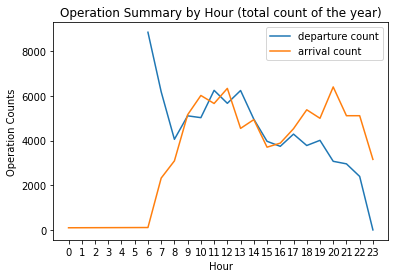

In [63]:
plt.plot(hourly_summary['departure count'])
plt.plot(arrival_summary['arrival count'])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Operation Counts')
plt.title('Operation Summary by Hour (total count of the year)')
plt.show()

**Key obeservation**: Departure peaks at early morning(around 6 and 7) and the arrival seems to peak around noon and night (8 pm to 9 pm).

**Now: focus on July 13**

In [64]:
july_13_daily_summ = pd.read_csv('./output/july_13_daily_summ.csv').iloc[:,1:]

In [65]:
july_13_daily_summ

,hour,departure count,arrival count,opeartion count
0,5,0,1,1
1,6,28,9,37
2,7,17,18,35
3,8,10,20,30
4,9,15,15,30
5,10,14,13,27
6,11,23,13,36
7,12,10,15,25
8,13,19,13,32
9,14,15,12,27


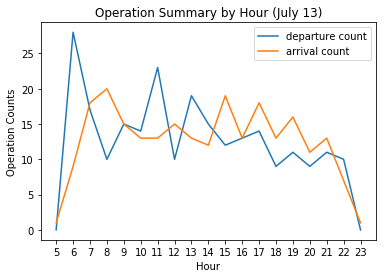

In [66]:
plt.plot(july_13_daily_summ['hour'], july_13_daily_summ['departure count'])
plt.plot(july_13_daily_summ['hour'], july_13_daily_summ['arrival count'])
plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Operation Counts')
plt.title('Operation Summary by Hour (July 13)')
plt.show()

### 13. Peak Counts 

**Maximum Departure Count**: 28 happen in **6am**    
**Maximum Arrival Count**: 10 happen in **8am**   
**Maximum Total Operation Count**: 37 happen in **6am**   

_The trend and the peak for AWPM is consistent with the trend and peak for total count over the year of 2011_. 

### 14. Rolling hour

In [67]:
import datetime

In [68]:
datetime.timedelta(minutes=60)

datetime.timedelta(0, 3600)

In [69]:
july_13_opt = san_old[san_old['dt'].dt.month == 7]
july_13_opt = july_13_opt[july_13_opt['dt'].dt.day == 13]    

In [70]:
hour = []
minute = []

In [71]:
for i in range(24):
    for j in range(60):
        hour = np.append(hour, i)
        minute = np.append(minute, j)

In [72]:
rolling = pd.DataFrame(hour).astype(int)
rolling['min'] = minute.astype(int)
rolling = rolling.rename(columns = {0:'h'})

In [73]:
san_july13_dept = san_old_dept[san_old_dept['dt'].dt.month == 7]
san_july13_dept = san_july13_dept[san_july13_dept['dt'].dt.day == 13]
san_july13_arr = san_old_arr[san_old_arr['at'].dt.month == 7]
san_july13_arr = san_july13_arr[san_july13_arr['at'].dt.day == 13]

In [74]:
san_july13_dept['hour'] = san_july13_dept['dt'].dt.hour
san_july13_dept['min'] = san_july13_dept['dt'].dt.minute

In [75]:
san_july13_arr['hour'] = san_july13_arr['at'].dt.hour
san_july13_arr['min'] = san_july13_arr['at'].dt.minute

In [76]:
rolling = pd.read_csv('./output/rolling.csv').iloc[:,1:]

In [77]:
dtobj = []
for i in range(len(rolling)):
    dth = hour[i]
    dtm = minute[i]
    dtobject = datetime.timedelta(minutes = dtm, hours = dth)
    dtobj = np.append(dtobj, dtobject)

In [78]:
rolling['time'] = dtobj

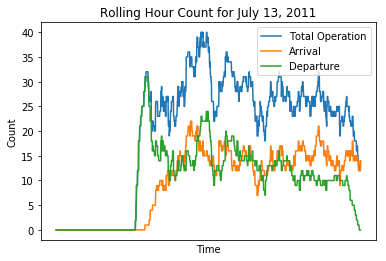

In [79]:
plt.plot(rolling['time'], rolling['Operation Count'], label = 'Total Operation')
plt.plot(rolling['time'], rolling['Arrival Count'], label = 'Arrival')
plt.plot(rolling['time'], rolling['Departure Count'], label = 'Departure')
plt.xticks([])
plt.title('Rolling Hour Count for July 13, 2011')
plt.ylabel('Count')
plt.xlabel('Time')
plt.legend()
plt.show()


### 15. Peak Counts 

**Maximum Departure: ** 31 from **07:05** to **07:14**  
**Maximum Arrival: ** 22 from **10:35** to **10:41**  
**Maximum Total Opeartions: ** 40 from **11:25** to **11:26**, **11:29**, **11:34** and **11:51** to **11:52**

---
## Part V Forecasting Growth in 2018

### a)

In [80]:
base_year_dept = len(san_old[san_old['Dep Airport Code'] == 'SAN'])

In [81]:
base_year_arr = len(san_old[san_old['Arr Airport Code'] == 'SAN'])

In [82]:
year_list = np.arange(2011, 2019)

In [83]:
year_list

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [84]:
forcasting = pd.DataFrame(year_list).rename(columns = {0: 'Year'})

In [85]:
dept_for = []
arr_for = []

for i in range(len(forcasting)):
    multiplier = 1.028 ** i 
    dept_for = np.append(dept_for, multiplier * base_year_dept)
    arr_for = np.append(arr_for, multiplier * base_year_arr)

In [86]:
forcasting['departure forecasting'] = dept_for 
forcasting['arrival forecasting'] = arr_for

In [87]:
forcasting['total operation forecasting'] = forcasting['departure forecasting'] + forcasting['arrival forecasting']

In [88]:
forcasting

,Year,departure forecasting,arrival forecasting,total operation forecasting
0,2011,80580.000000,80584.000000,161164.000000
1,2012,82836.240000,82840.352000,165676.592000
2,2013,85155.654720,85159.881856,170315.536576
3,2014,87540.013052,87544.358548,175084.371600
4,2015,89991.133418,89995.600587,179986.734005
5,2016,92510.885153,92515.477404,185026.362557
6,2017,95101.189938,95105.910771,190207.100709
7,2018,97764.023256,97768.876273,195532.899529


### b)

In [89]:
san_2012_actype = san_2011_actype
san_2012_actype['Count'] = san_2011_actype['Count'] * 1.028

In [90]:
san_2013_actype = san_2012_actype
san_2013_actype['Count'] = san_2012_actype['Count'] * 1.028

In [91]:
san_2014_actype = san_2013_actype
san_2014_actype['Count'] = san_2014_actype['Count'] * 1.028

In [92]:
san_2015_actype = san_2014_actype
san_2015_actype['Count'] = san_2015_actype['Count'] * 1.028

In [93]:
san_2016_actype = san_2015_actype
san_2016_actype['Count'] = san_2016_actype['Count'] * 1.028

In [94]:
san_2017_actype = san_2016_actype
san_2017_actype['Count'] = san_2017_actype['Count'] * 1.028

In [95]:
san_2018_actype_f = san_2017_actype
san_2018_actype_f['Count'] = san_2018_actype_f['Count'] * 1.028

In [96]:
san_2018_actype_f

,Aircraft Type,Count,Percentage(%)
0,Boeing 737-700 Passenger,50869.322004,26.015736
1,Boeing 737-300 Passenger,26806.851500,13.709637
2,Airbus A320,20331.713846,10.398104
3,Boeing 737-800 Passenger,10426.706576,5.332456
4,Boeing 737-800 (winglets) Passenger,9632.025076,4.926038
5,Airbus A319,9013.265435,4.609590
6,Embraer RJ140,8667.487989,4.432752
7,Embraer 120 Brasilia,7696.884631,3.936363
8,Canadair Regional Jet,6515.175042,3.332010
9,Boeing 757-200 Passenger,5981.343195,3.058996


Without grouping, according to the above forecasting, **Boeing 777 passenger** surpass the 500 annual operation floor and it should be considered the design aircraft (the same reason as for Q3). The design aircraft does not change according to the forecasting. 

### c) 

In [98]:
awpm_2012 = july_13_daily_summ
awpm_2012['forecasted departure'] = awpm_2012['departure count'] * 1.028
awpm_2012['forecasted arrival'] = awpm_2012['arrival count'] * 1.028
awpm_2012['forecasted total'] = awpm_2012['opeartion count'] * 1.028
awpm_2012 = awpm_2012.iloc[:, 4:7]

In [99]:
awpm_2013 = awpm_2012 
awpm_2013['forecasted departure'] = awpm_2013['forecasted departure'] * 1.028 
awpm_2013['forecasted arrival'] = awpm_2013['forecasted arrival'] * 1.028 
awpm_2013['forecasted total'] = awpm_2013['forecasted total'] * 1.028 


In [100]:
awpm_2014 = awpm_2013 
awpm_2014['forecasted departure'] = awpm_2014['forecasted departure'] * 1.028 
awpm_2014['forecasted arrival'] = awpm_2014['forecasted arrival'] * 1.028 
awpm_2014['forecasted total'] = awpm_2014['forecasted total'] * 1.028 

In [101]:
awpm_2015 = awpm_2014 
awpm_2015['forecasted departure'] = awpm_2015['forecasted departure'] * 1.028 
awpm_2015['forecasted arrival'] = awpm_2015['forecasted arrival'] * 1.028 
awpm_2015['forecasted total'] = awpm_2015['forecasted total'] * 1.028 

In [102]:
awpm_2016 = awpm_2015 
awpm_2016['forecasted departure'] = awpm_2016['forecasted departure'] * 1.028 
awpm_2016['forecasted arrival'] = awpm_2016['forecasted arrival'] * 1.028 
awpm_2016['forecasted total'] = awpm_2016['forecasted total'] * 1.028 

In [103]:
awpm_2017 = awpm_2016 
awpm_2017['forecasted departure'] = awpm_2017['forecasted departure'] * 1.028 
awpm_2017['forecasted arrival'] = awpm_2017['forecasted arrival'] * 1.028 
awpm_2017['forecasted total'] = awpm_2017['forecasted total'] * 1.028 

In [104]:
awpm_2018_f = awpm_2017 
awpm_2018_f['forecasted departure'] = awpm_2018_f['forecasted departure'] * 1.028 
awpm_2018_f['forecasted arrival'] = awpm_2018_f['forecasted arrival'] * 1.028 
awpm_2018_f['forecasted total'] = awpm_2018_f['forecasted total'] * 1.028 

In [105]:
awpm_2012

,forecasted departure,forecasted arrival,forecasted total
0,0.000000,1.213254,1.213254
1,33.971118,10.919288,44.890405
2,20.625321,21.838576,42.463897
3,12.132542,24.265084,36.397626
4,18.198813,18.198813,36.397626
5,16.985559,15.772305,32.757863
6,27.904847,15.772305,43.677151
7,12.132542,18.198813,30.331355
8,23.051830,15.772305,38.824134
9,18.198813,14.559050,32.757863


In [106]:
awpm_2013

,forecasted departure,forecasted arrival,forecasted total
0,0.000000,1.213254,1.213254
1,33.971118,10.919288,44.890405
2,20.625321,21.838576,42.463897
3,12.132542,24.265084,36.397626
4,18.198813,18.198813,36.397626
5,16.985559,15.772305,32.757863
6,27.904847,15.772305,43.677151
7,12.132542,18.198813,30.331355
8,23.051830,15.772305,38.824134
9,18.198813,14.559050,32.757863


In [107]:
awpm_2014

,forecasted departure,forecasted arrival,forecasted total
0,0.000000,1.213254,1.213254
1,33.971118,10.919288,44.890405
2,20.625321,21.838576,42.463897
3,12.132542,24.265084,36.397626
4,18.198813,18.198813,36.397626
5,16.985559,15.772305,32.757863
6,27.904847,15.772305,43.677151
7,12.132542,18.198813,30.331355
8,23.051830,15.772305,38.824134
9,18.198813,14.559050,32.757863


In [108]:
awpm_2015

,forecasted departure,forecasted arrival,forecasted total
0,0.000000,1.213254,1.213254
1,33.971118,10.919288,44.890405
2,20.625321,21.838576,42.463897
3,12.132542,24.265084,36.397626
4,18.198813,18.198813,36.397626
5,16.985559,15.772305,32.757863
6,27.904847,15.772305,43.677151
7,12.132542,18.198813,30.331355
8,23.051830,15.772305,38.824134
9,18.198813,14.559050,32.757863


In [109]:
awpm_2016

,forecasted departure,forecasted arrival,forecasted total
0,0.000000,1.213254,1.213254
1,33.971118,10.919288,44.890405
2,20.625321,21.838576,42.463897
3,12.132542,24.265084,36.397626
4,18.198813,18.198813,36.397626
5,16.985559,15.772305,32.757863
6,27.904847,15.772305,43.677151
7,12.132542,18.198813,30.331355
8,23.051830,15.772305,38.824134
9,18.198813,14.559050,32.757863


In [110]:
awpm_2017

,forecasted departure,forecasted arrival,forecasted total
0,0.000000,1.213254,1.213254
1,33.971118,10.919288,44.890405
2,20.625321,21.838576,42.463897
3,12.132542,24.265084,36.397626
4,18.198813,18.198813,36.397626
5,16.985559,15.772305,32.757863
6,27.904847,15.772305,43.677151
7,12.132542,18.198813,30.331355
8,23.051830,15.772305,38.824134
9,18.198813,14.559050,32.757863


In [111]:
awpm_2018_f

,forecasted departure,forecasted arrival,forecasted total
0,0.000000,1.213254,1.213254
1,33.971118,10.919288,44.890405
2,20.625321,21.838576,42.463897
3,12.132542,24.265084,36.397626
4,18.198813,18.198813,36.397626
5,16.985559,15.772305,32.757863
6,27.904847,15.772305,43.677151
7,12.132542,18.198813,30.331355
8,23.051830,15.772305,38.824134
9,18.198813,14.559050,32.757863


### d)

In [112]:
base_year_max_dep = max(july_13_daily_summ['departure count'])
base_year_max_arr = max(july_13_daily_summ['arrival count'])
base_year_max_total = max(july_13_daily_summ['opeartion count'])

In [113]:
dept_for = []
arr_for = []

for i in range(len(forcasting)):
    multiplier = 1.028 ** i 
    dept_for = np.append(dept_for, multiplier * base_year_dept)
    arr_for = np.append(arr_for, multiplier * base_year_arr)

In [114]:
forcasting_peak_hour = forcasting

In [115]:
dept_hour_for = []
arr_hour_for = []
total_hour_for = []

for i in np.arange(0,8):
    multiplier = 1.028 ** i 
    dept_hour_for = np.append(dept_hour_for, multiplier * base_year_max_dep)
    arr_hour_for = np.append(arr_hour_for, multiplier * base_year_max_arr)
    total_hour_for = np.append(total_hour_for, multiplier * base_year_max_total)

In [116]:
forcasting_peak_hour['peak departure forecast'] = dept_hour_for 
forcasting_peak_hour['peak arrival forecast'] = arr_hour_for 
forcasting_peak_hour['peak total operation forecast'] = total_hour_for

In [117]:
forcasting_peak_hour = forcasting_peak_hour.iloc[:, [0, 4, 5, 6]]

In [118]:
forcasting_peak_hour

,Year,peak departure forecast,peak arrival forecast,peak total operation forecast
0,2011,28.000000,20.000000,37.000000
1,2012,28.784000,20.560000,38.036000
2,2013,29.589952,21.135680,39.101008
3,2014,30.418471,21.727479,40.195836
4,2015,31.270188,22.335848,41.321320
5,2016,32.145753,22.961252,42.478317
6,2017,33.045834,23.604167,43.667709
7,2018,33.971118,24.265084,44.890405


### e) 

In [119]:
rolling_hour_forcasting = forcasting_peak_hour

In [120]:
base_year_max_dep_rh = 31
base_year_max_arr_rh = 22
base_year_max_total_rh = 40

In [121]:
dept_hour_for_rh = []
arr_hour_for_rh = []
total_hour_for_rh = []

for i in np.arange(0,8):
    multiplier = 1.028 ** i 
    dept_hour_for_rh = np.append(dept_hour_for_rh, multiplier * base_year_max_dep_rh)
    arr_hour_for_rh = np.append(arr_hour_for_rh, multiplier * base_year_max_arr_rh)
    total_hour_for_rh = np.append(total_hour_for_rh, multiplier * base_year_max_total_rh)

In [122]:
rolling_hour_forcasting['peak departure (rolling hour)'] = dept_hour_for_rh

/Users/hanzhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [123]:
rolling_hour_forcasting['peak arrival (rolling hour)'] = arr_hour_for_rh

/Users/hanzhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
rolling_hour_forcasting['peak total (rolling hour)'] = total_hour_for_rh

In [125]:
rolling_hour_forcasting = rolling_hour_forcasting.iloc[:, [0, 4, 5, 6]] 

In [126]:
rolling_hour_forcasting

,Year,peak departure (rolling hour),peak arrival (rolling hour),peak total (rolling hour)
0,2011,31.000000,22.000000,40.000000
1,2012,31.868000,22.616000,41.120000
2,2013,32.760304,23.249248,42.271360
3,2014,33.677593,23.900227,43.454958
4,2015,34.620565,24.569433,44.671697
5,2016,35.589941,25.257377,45.922504
6,2017,36.586459,25.964584,47.208335
7,2018,37.610880,26.691592,48.530168


---
## Part VI Evaluate the actual 2018 SAN Schedule

### 17. 2018 SAN Schedule

In [127]:
san_new['dt'] = pd.to_datetime(san_new['Dep_Date'] + " " + san_new['Dep_Time'])
san_new['at'] = pd.to_datetime(san_new['Arr_Date'] + " " + san_new['Arr_Time'])

In [128]:
len(san_new[san_new['Dep Airport Code'] == 'SAN'])

100127

In [129]:
len(san_new[san_new['Arr Airport Code'] == 'SAN'])

100102

There are **100127** departures, **100102** arrivals and **200229** total operations in 2018

### 18. Design Aircraft (2018) 

In [130]:
san_18_actype = san_18_actype.rename(columns = {'Unnamed: 0': 'Aircraft Type'})
san_18_actype

,Aircraft Type,Count
0,Boeing 737-700 (winglets) Passenger,58576
1,Boeing 737-800 (winglets) Passenger,23467
2,Embraer 175,22294
3,Boeing 737-800 Passenger,15998
4,Airbus A321,12865
5,Airbus A320,12136
6,Boeing 737-900 Passenger,11470
7,Boeing 737-900 (winglets) Passenger,6768
8,Airbus A321 (Sharklets),5768
9,Airbus A319,4904


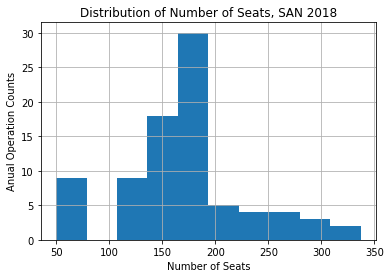

In [131]:
san_new_by_seats[['Seats']].hist()
plt.xlabel('Number of Seats')
plt.ylabel('Anual Operation Counts')
plt.title('Distribution of Number of Seats, SAN 2018')
plt.show()

If we focus on the aircrafts with more than 270 seats: 


In [132]:
large_aircraft = san_new_by_seats[san_new_by_seats['Seats'] > 270]
large_aircraft

,Seats,Specific Aircraft Name,count
76,275,Boeing 747-400 (Passenger),288
77,278,Airbus A330-200,728
78,279,Airbus A340-300,390
79,281,Airbus A340-600,4
80,296,Boeing 777-300ER Passenger,4
81,297,Boeing 777 Passenger,430
82,314,Airbus A340-300,100
83,337,Boeing 747-400 (Passenger),4


Although only A330-200 achieves an annual operation number more than 500, grouping all the aircraft with more than 270 seats together, they achieve a total annual operation more than 500.  
**Motivation for grouping: ** according to [the ADG Group by Airbus](https://www.airbus.com/content/dam/corporate-topics/publications/backgrounders/techdata/general-information/Airbus-Commercial-Aircraft-ICAO-ARC-FAA-ADG-App-Cat.pdf) and [by Boeing](http://www.boeing.com/assets/pdf/commercial/airports/faqs/aircraftdesigngroup.pdf), all the aircrafts with more than 270 seats belong to ADG Group **V** (by FAA) or **E** (by ICAO). 

**The design aircraft changes **in 2018.   

Take a closer look at the change, copared to 2011, the chagne is due to the Lufthansa's new commercial flight between **FRA** and **SAN**, which mostly use **Airbus A340-300 and A340-600**; Edelweiss's flight to **ZRH** using **Airbus A340-300**;and British Airways' use of **747-400** in the flight between **LHR** and **SAN**. 

It is meaningful to ensure the opeartion requirements for the new design aircraft type. Lufthansa makes a total number of 394 operations,British Airways makes 724 operations and Edelweiss, 100, during 2018.
Indeed, **FRA**, **LHR** and **ZRH** are the only three non-stop European destinations. 

In [133]:
len(san_new[san_new['Carrier Code'] == 'WK'])

100

In [134]:
len(san_new[san_new['Carrier Code'] == 'BA'])

724

In [135]:
len(san_new[san_new['Carrier Code'] == 'LH'])

394

Looking at the dimensions for all the aircrafts in the group with 270 and more seats, **Boeing 747-400 has the maximal tail height (19.59 m / 64 ft 3 in) and wheel span (11 m / 36 ft 1 in), while Boeing 777-300ER has the greatest length (73.08 m / 239 ft 4 in) and wingspan (64.80 m / 212 ft 7 in).** However, **A340-600** has the maximal runway length requirement at the sea level (where SAN is located), maximal take off weight on a standard day.  

Therefore, when tail height and wheel span are needed for design, **Boeing 747-400** should be the design aircraft.  

When length and wingspan needed for design, **Boeing 777-300ER** should be considered the design aircraft.  

When planning for runway, **Boeing 777-300ER and Boeing 747-400** should be the design aircraft (because they have similar runway length requirement at their MTOW)

#### Calculating New Runway Length

Because **SAN** is roughly at sea level, when taking look at the Payload chart for **Runway Length Requirement** at Maximum Take Off Weight, the 777-300ER variant with the greatest runway length requirement is roughly 3200 m (10,500 ft). The 747-400 variant with the greatest runway length requirement at the Maximum Take Off Weight is also around 3200 m (10,500 ft).  

Although we have to take into consideration of new design aircraft for runway length, the calculated runway length does not change. It reamins the **same**.

### 19. Performance Summary

In [136]:
days = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])

In [137]:
san_new_summ['Average Daily Arrival Count'] = san_new_summ['Arrival Count']/days

In [138]:
san_new_summ['Average Daily Departure Count'] = san_new_summ['Departure Count']/days

In [139]:
san_new_summ['Average Daily Operation Count'] = san_new_summ['Total Operation Count']/days

In [140]:
san_new_summ

,Month,Arrival Count,Departure Count,Total Operation Count,Average Daily Arrival Count,Average Daily Departure Count,Average Daily Operation Count
0,1,7836,7836,15672,252.774194,252.774194,505.548387
1,2,7023,7023,14046,250.821429,250.821429,501.642857
2,3,8213,8213,16426,264.935484,264.935484,529.870968
3,4,8188,8192,16380,272.933333,273.066667,546.000000
4,5,8568,8568,17136,276.387097,276.387097,552.774194
5,6,8759,8761,17520,291.966667,292.033333,584.000000
6,7,9159,9159,18318,295.451613,295.451613,590.903226
7,8,9033,9035,18068,291.387097,291.451613,582.838710
8,9,8248,8251,16499,274.933333,275.033333,549.966667
9,10,8548,8545,17093,275.741935,275.645161,551.387097


Therefore, the **PEAK MONTH** is **JULY** for 2018.   
Take a look at the July data. 

In [141]:
san_17_dept = san_new[san_new['Dep Airport Code'] == 'SAN']
san_17_arr = san_new[san_new['Arr Airport Code'] == 'SAN']

In [142]:
san_17_dept_july = san_17_dept[san_17_dept['dt'].dt.month == 7]
san_17_arr_july = san_17_arr[san_17_arr['at'].dt.month == 7]

In [143]:
san_17_dept_july['weekday'] = san_17_dept_july['dt'].dt.weekday
san_17_arr_july['weekday'] = san_17_arr_july['at'].dt.weekday

/Users/hanzhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/hanzhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Average number of arrivals, departures and total operations for weekdays in July, 2018**

In [144]:
san_17_dept_july[san_17_dept_july['weekday']<5]['dt'].dt.day.value_counts()

20    308
13    308
30    307
23    306
16    306
19    305
12    305
26    305
9     305
27    305
11    301
24    300
10    300
25    300
18    300
17    298
31    298
6     296
5     291
2     288
3     265
4     253
Name: dt, dtype: int64

The **average weekday arrivals** is: 

In [145]:
np.mean(san_17_dept_july[san_17_dept_july['weekday']<5]['dt'].dt.day.value_counts())

297.72727272727275

The **average weekday departures** is: 

In [146]:
np.mean(san_17_arr_july[san_17_arr_july['weekday']<5]['at'].dt.day.value_counts())

297.6363636363636

Therefore, the **average daily total operation is: **595

Because according to the data summary, **July 17, 2018** has similar daily number of arrivals, departures and total operation for average weekday counts, therefore, we choose **July 17, 2018** as the **average weekday**.

In [147]:
len(san_17_dept_july[san_17_dept_july['dt'].dt.day == 17])

298

In [148]:
len(san_17_arr_july[san_17_arr_july['at'].dt.day == 17])

299

Therefore, on **AWPM** (July 17), there are **298 departures, 299 arrivals, and 597 total operations**. 

### 20. Hour Count for AWPM 

In [149]:
dept_awpm = san_17_dept_july[san_17_dept_july['dt'].dt.day == 17]

In [150]:
arr_awpm = san_17_arr_july[san_17_arr_july['at'].dt.day == 17]

In [151]:
dept_17_hour = dept_awpm['dt'].dt.hour.value_counts().to_frame().reset_index().rename(columns = {'index':'hour', 'dt':'dept count'})

In [152]:
arr_17_hour = arr_awpm['at'].dt.hour.value_counts().to_frame().reset_index().rename(columns = {'index':'hour', 'at':'arr count'})

**Maximum Arrivals Hour:**

In [153]:
awpm_17_summ[awpm_17_summ['arr count'] == max(awpm_17_summ['arr count'])]

,hour,dept count,arr count,total operation count
11,22,15,25,40


The **peak hour for arrivals on AWPM is 22** count: 25

**Maximum Departure Hour:**

In [154]:
awpm_17_summ[awpm_17_summ['dept count'] == max(awpm_17_summ['dept count'])]

,hour,dept count,arr count,total operation count
0,7,28,12,40


The **peak hour for departures on AWPM is 7** count: 28

**Maximum Total Operation Hour:**

In [155]:
awpm_17_summ[awpm_17_summ['total operation count'] == max(awpm_17_summ['total operation count'])]

,hour,dept count,arr count,total operation count
8,10,17,24,41


The **peak hour for total operation on AWPM is 10** count: 41

### 21. AWPM Analysis

In [156]:
dtobj = []
for i in range(len(rolling)):
    dth = hour[i]
    dtm = minute[i]
    dtobject = datetime.timedelta(minutes = dtm, hours = dth)
    dtobj = np.append(dtobj, dtobject)

In [157]:
rolling_18['time'] = dtobj

In [158]:
arr_awpm['xiaoshi'] = arr_awpm['at'].dt.hour

/Users/hanzhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [159]:
arr_awpm['fenzhong'] = arr_awpm['at'].dt.minute

/Users/hanzhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [168]:
dept_awpm['xiaoshi'] = dept_awpm['dt'].dt.hour
dept_awpm['fenzhong'] = dept_awpm['dt'].dt.minute

/Users/hanzhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/hanzhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [170]:
dept_c = []
for i in range(len(rolling_18['h'])):
    dept_count = 0 
    xiaoshi = rolling_18.iloc[i, 0]
    fenzhong = rolling_18.iloc[i, 1]
    for j in range(len(dept_awpm)):
        xs = dept_awpm.iloc[j, 13]
        fz = dept_awpm.iloc[j, 14]
        diff = 60 * (xiaoshi-xs) + (fenzhong - fz)
        if diff > 0:
            if diff < 60: 
                dept_count = dept_count + 1
    dept_c = np.append(dept_c, dept_count)

In [171]:
arr_c = []
for i in range(len(rolling_18)):
    arr_count = 0 
    xiaoshi = rolling_18.iloc[i, 0]
    fenzhong = rolling_18.iloc[i, 1]
    for j in range(len(arr_awpm)):
        xs = arr_awpm.iloc[j, 13]
        fz = arr_awpm.iloc[j, 14]
        diff = 60 * (xiaoshi-xs) + (fenzhong - fz)
        if diff > 0:
            if diff < 60: 
                arr_count = arr_count + 1
    arr_c = np.append(arr_c, arr_count)

In [172]:
rolling_18['departure count'] = dept_c.astype(int)

In [173]:
rolling_18['arrival count'] = arr_c.astype(int)

In [174]:
rolling_18['total operation'] = rolling_18['departure count'] + rolling_18['arrival count']

**The maximum departure rolling hour:** 

In [175]:
rolling_18[rolling_18['departure count'] == max(rolling_18['departure count'])]

,h,min,time,departure count,arrival count,total operation
433,7,13,07:13:00,36,7,43
434,7,14,07:14:00,36,7,43


**The maximum arrival rolling hour:** 

In [176]:
rolling_18[rolling_18['arrival count'] == max(rolling_18['arrival count'])]

,h,min,time,departure count,arrival count,total operation
1407,23,27,23:27:00,9,32,41


**The maximum operation rolling hour:** 

In [177]:
rolling_18[rolling_18['total operation'] == max(rolling_18['total operation'])]

,h,min,time,departure count,arrival count,total operation
643,10,43,10:43:00,19,26,45
651,10,51,10:51:00,20,25,45


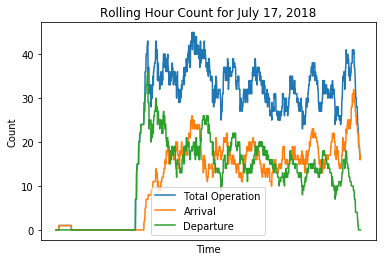

In [178]:
plt.plot(rolling_18['time'], rolling_18['total operation'], label = 'Total Operation')
plt.plot(rolling_18['time'], rolling_18['arrival count'], label = 'Arrival')
plt.plot(rolling_18['time'], rolling_18['departure count'], label = 'Departure')
plt.xticks([])
plt.title('Rolling Hour Count for July 17, 2018')
plt.ylabel('Count')
plt.xlabel('Time')
plt.legend()
plt.show()

---
## Part VII Discussion Questions

### 22. Operation Summary

#### a) Operations 

In [180]:
forcasting

,Year,departure forecasting,arrival forecasting,total operation forecasting,peak departure forecast,peak arrival forecast,peak total operation forecast
0,2011,80580.000000,80584.000000,161164.000000,28.000000,20.000000,37.000000
1,2012,82836.240000,82840.352000,165676.592000,28.784000,20.560000,38.036000
2,2013,85155.654720,85159.881856,170315.536576,29.589952,21.135680,39.101008
3,2014,87540.013052,87544.358548,175084.371600,30.418471,21.727479,40.195836
4,2015,89991.133418,89995.600587,179986.734005,31.270188,22.335848,41.321320
5,2016,92510.885153,92515.477404,185026.362557,32.145753,22.961252,42.478317
6,2017,95101.189938,95105.910771,190207.100709,33.045834,23.604167,43.667709
7,2018,97764.023256,97768.876273,195532.899529,33.971118,24.265084,44.890405


There are **100127** departures, **100102** arrivals and **200229** total operations in 2018.   
According to the forecasting, there are **97764** departures and **97764** arrivals, which is very close to the true counts of operations. 

#### b) Design Aircraft 

(1)The design aircraft by forecasting is Boeing 777. In fact, the design aircraft is Boeing 777 and Boeing 747.  
(2)The forecasting does not consider the introduction of the new aircraft type.  
(3)However, the forecasting is still effective because it still consider Boeing 777 as its design aircraft, which would give the same result for runway length requirement. 

#### c) Peak Hour  AWPM

According to the forecasting, the max hour departure is 34, arrival is 24 and total operation is 44 on AWPM. 
In fact, max hour departure is 28, arrival is 25 and total operation is 41 on AWPM.  
The forecasting overestimate the max departure by around 20%, but almost correctly predict the max hourly arrivals and total operations.  
Therefore, the result of the forecasting is reasonably reliable. 

#### d) Peak Rolling Hour AWPM

37 26 48
According to the forecasting, the max rolling hour departure is 37, arrival is 26 and total operation is 48 on AWPM. 
In fact, max hour departure is 36, arrival is 32 and total operation is 45 on AWPM.  
The forecasting underestimates the max rolling hour arrivals by around 27%, but almost correctly predict the max rolling hour arrivals and total operations.  
Therefore, the result of the forecasting is reasonably reliable. 

### 23. Under Built 

According to the data summary in 22, while the forecasting almost correctly predict the total operations, with slightly underestimation, it overestimates the max hourly departures on AWPM and underestimates the max rolling hour arrivals.   
While other forecasting is precise, if I built an airport based on forecasting, it will be slightly **under built**. 

### 24. Perspectives

**Passenger perspective:**  
1. The airport has seen a growth of operations from around 8000 departures, 8000 arrivals and 16,000 total operations to 10,000 departures, 10,000 arrivals and 20,000 total operations. The growth of operations would mean more choices of flights to passengers. To be more specific, **more time flexibility and more destinations** choices. For example, while in 2011 there were only 1 intercontinental flight, from SAN to LHR, in 2018, there are three non-stop routes to Europe.  
2. However, the airport is more crowded. While there is a growth in operations, the runway remains the same. Therefore, the passengers would reasonably expect more traffic and crowd. This would means possibly more delays, more crowded waiting rooms and more waiting time etc.   

**Airline perspective:**  
1. The airport has seen and increase in operations. Therefore, the airline would expect **more passengers**. Moreover, more operations might influence the pricing strategies, aircraft type choices and adjustment for scheduling etc.   
2. The airport might encounter increased burden during the peak rolling hour. Therefore, the airlines should be prepared.

**FAA perspective:** 
1. The biggest challenge for FAA is to make sure the safety of the airport operations. More operations in the airport while the runway remains the same require more coordination  from ATC.  
2. According to the growth, the airport might be under built in the future. Therefore, FAA might consider the future expansion and construction. 